#### Import Libraries

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve
from imblearn.over_sampling import SMOTE
 

#### Function to Save the results to CSV

In [14]:
def save_results(y_test, y_pred, y_prob):
    result = {
        'Actual' : y_test,
        'Predicted': y_pred,
        'Probability': y_prob
    }
    results_df = pd.DataFrame(result)
    results_df.to_csv('fraud_detection_results.csv', index=False)


In [15]:
def save_precision_recall(y_test, y_pred):
    precisions, recalls, thresholds = precision_recall_curve(y_test, y_prob)
    pr_data = pd.DataFrame({
        'Precision': precisions[:-1],  # Exclude the last point
        'Recall': recalls[:-1],        # Exclude the last point
        'Threshold': thresholds
    })
    pr_data.to_csv('precision_recall_data.csv', index=False)

#### Function to calculate and print evaluation metrics

In [17]:
def evalMetrics (y_test,y_pred,y_prob):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix: {conf_matrix}\n")
    print(f"Accuracy: {accuracy:.5f}")
    print(f"Precision: {precision:.5f}")
    print(f"Recall: {recall:.5f}")
    print(f"F1-Score: {f1:.5f}")
    print(f"ROC-AUC: {roc_auc:.5f}")
    return accuracy, precision, recall, f1, roc_auc, conf_matrix


#### Function to draw graph 

In [19]:
def drawGraph(y_test,y_prob) :
    roc_auc = roc_auc_score(y_test, y_prob)

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.figure()
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

#### Configs

In [21]:
file = './PS_20174392719_1491204439457_log.csv'
sample_size = None;

#### Load data

In [23]:
df = pd.read_csv(file)
df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [24]:
# if sample_size: 
#     df = df.sample(n=sample_size, random_state=42)

#### Data Preprocessing
#### Handle Missing Values
#### Check for missing values

In [26]:
print(df.isnull().sum())

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


#### Initial Fraud and Non Fraud count

In [28]:
fraud_count = df[df['isFraud'] == 1].shape[0]
non_fraud_count = df[df['isFraud'] == 0].shape[0]
print(fraud_count)
print(non_fraud_count)


8213
6354407


#### Drop rows with missing values (if any)

In [30]:
df.dropna(inplace=True)

#### Convert 'type' column to numerical codes

In [80]:
df['type'] = df['type'].astype('category').cat.codes

In [82]:
df['type']

0          3
1          3
2          4
3          1
4          3
          ..
6362615    1
6362616    4
6362617    1
6362618    4
6362619    1
Name: type, Length: 6362620, dtype: int8

#### Separate features and target variable

In [34]:
X = df.drop(['isFraud', 'nameOrig', 'nameDest'], axis=1)
y = df['isFraud']

#### Implementation using smote

#### Split the resampled data into training and testing sets
    

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42 , stratify=y)

#### Apply Smote

In [39]:
smote = SMOTE(sampling_strategy=0.3, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

#### Fraud and Non Fraud count after using smote

In [41]:
fraud_count = y_resampled.value_counts() 
print(fraud_count)

isFraud
0    4448085
1    1334425
Name: count, dtype: int64


#### Model Training

In [43]:
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced", n_jobs=-1)
model.fit(X_resampled, y_resampled)

RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=42)

#### Making Predictions

In [45]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1] # Probabilities for positive classes

#### Show Metrics

In [47]:
metrics = evalMetrics(y_test,y_pred,y_prob)

Confusion Matrix: [[1905242    1080]
 [    180    2284]]

Accuracy: 0.99934
Precision: 0.67895
Recall: 0.92695
F1-Score: 0.78380
ROC-AUC: 0.99879


#### Graph

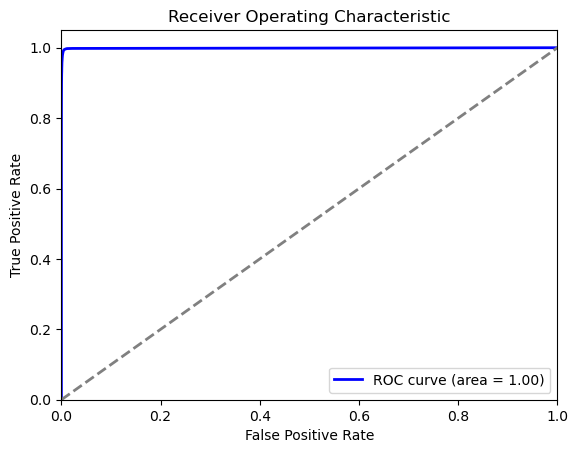

In [49]:
drawGraph(y_test,y_prob)

#### Store results

In [51]:
# results_df = pd.DataFrame({ 'Actual': y_test, 'Predicted': y_pred, 'Probability': y_prob })
# results_df.to_csv('fraud_detection_results.csv', index=False)

In [52]:
save_results(y_test, y_pred, y_prob)

In [53]:
save_precision_recall(y_test, y_pred)